In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [19]:
matplotlib.rcParams.update({'font.size': 12})

In [4]:
outpath = "output/donor_acceptor_zscore/"

In [5]:
dataname = "HLCA4_P2_10x_with_postprocessing_lung"
df = pd.read_parquet("../scripts/output/rijk_zscore/{}_sym_S_0.1_z_0.0_b_5.pq".format(dataname),columns=["cell_gene","z_A","z_B","n.g_A","n.g_B"])

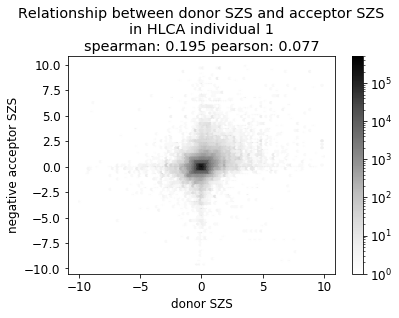

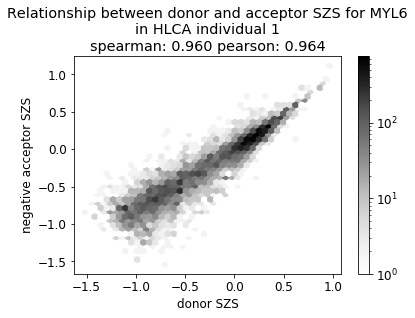

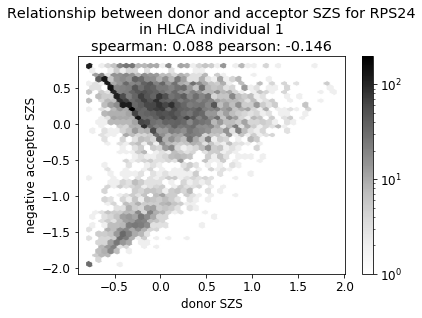

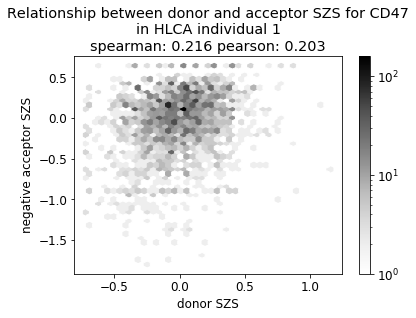

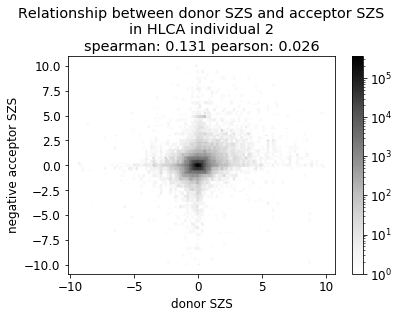

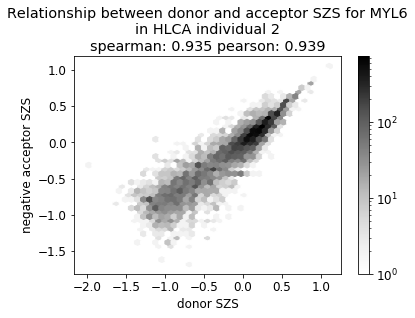

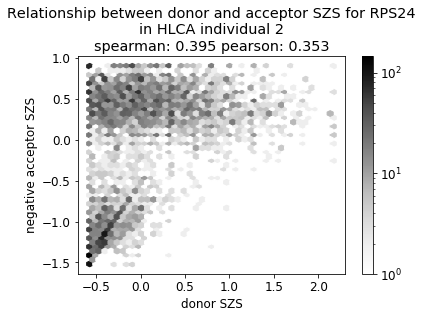

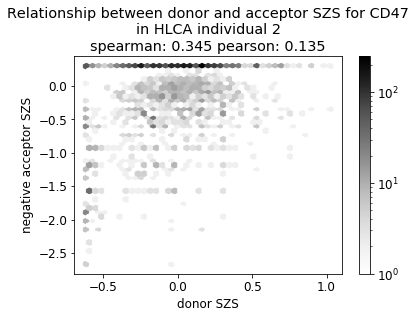

In [22]:
datanames = ["HLCA4_P2_10x_with_postprocessing_lung","HLCA4_P3_10x_with_postprocessing_lung"]
name_dict = {x : "HLCA individual {}".format(i) for x, i in zip(datanames,range(1,3))}
for dataname in datanames:

  df = pd.read_parquet("../scripts/output/rijk_zscore/{}_sym_S_0.1_z_0.0_b_5.pq".format(dataname),columns=["cell_gene","z_A","z_B","n.g_A","n.g_B"])
  df = df.dropna()
  df = df.drop_duplicates("cell_gene")
  for let in ["A","B"]:
    df["scZ_" + let] = df["z_" + let]/np.sqrt(df["n.g_" + let])

  sub = df[(abs(df["scZ_A"]) < 10) & (abs(df["scZ_B"]) < 10)]
  plt.hexbin(sub["scZ_A"],-sub["scZ_B"],gridsize=100,cmap="Greys",bins="log")
  plt.colorbar()
  plt.xlabel("donor SZS")
  plt.ylabel("negative acceptor SZS")
  # plt.xlim([-10,10])
  # plt.ylim([-10,10])
  plt.title("Relationship between donor SZS and acceptor SZS\nin {}\nspearman: {:.3f} pearson: {:.3f}".format(name_dict[dataname],-sub["scZ_A"].corr(sub["scZ_B"],method="pearson"),-sub["scZ_A"].corr(sub["scZ_B"],method="spearman")))
  plt.savefig("{}{}.png".format(outpath, dataname),bbox_inches = "tight")

  plt.show()

  # gene = "CD47"
  for gene in ["MYL6","RPS24","CD47"]:
    gene_df = df[df["cell_gene"].str.contains(gene)]
    plt.hexbin(gene_df["scZ_A"],-gene_df["scZ_B"],gridsize=40,cmap="Greys",bins="log")
    plt.xlabel("donor SZS")
    plt.ylabel("negative acceptor SZS")
    plt.title("Relationship between donor and acceptor SZS for {}\nin {}\nspearman: {:.3f} pearson: {:.3f}".format(gene,name_dict[dataname],-gene_df["scZ_A"].corr(gene_df["scZ_B"],method="pearson"),-gene_df["scZ_A"].corr(gene_df["scZ_B"],method="spearman")))
    plt.colorbar()
    plt.savefig("{}{}_{}.png".format(outpath, dataname, gene),bbox_inches = "tight")
    plt.show()